# Part 16: Nonlinear Dimension Reduction {-}

Consider the figure above.
In this case, an individual "observation" is an image of
a face. These faces are mapped into a two-dimensional space.
The faces along the bottom show how the faces evolve along
the line in the upper right of the figure.

This illustrates the use of **nonlinear dimension
reduction** on high-dimensional data. PCA would not have been
a good choice in this case because individual images cannot be
approximated by a linear combination of "basis" faces.

![From Roweis and Saul (2000), _Science_](faceex1.png)

\newpage

**Exercise:** What is the utility of the representation shown
in the previous figure?

\answerlines{7}

\newpage

Consider a synthetic case in which we have four points in
two-dimensions, labelled as in the following figure.

![](FourPoints.png)

Imagine calculating all of the pairwise distances between the
four points shown in the above figure.

Then ask: **What one-dimensional representation of the data
preserves those distances to the greatest extent possible?**

The answer is addressed by **multidimensional
scaling (MDS)**.

\newpage

The result, using the classic approach, is shown in the figure below.

![](FourPoints2.png)


**Exercise:** What is the practical motivation behind trying to find a low-dimensional
representation that preserves distances?

\answerlines{10}

\newpage

**Comment:** There is actually a direct connection between PCA and the distance-preserving idea presented above.

When using the first $k$ principal components to represent data of dimension greater than $k$, one is finding the $k$-dimensional representation that minimizes the **strain**. 

The strain is a measure of the dissimilarity between the original and low-dimensional distances. Its definition is a little technical, and we will omit it here. 

The procedure that results from the use of the strain as the loss metric is called **classic multidimensional scaling**.

A Python function to implement classic MDS can be found at

http://www.nervouscomputer.com/hfs/cmdscale-in-python/ 

If you were to run this procedure on the yield curve example of before, you would find that the $k$-dimensional representation returned matches (up to unimportant rotation) the representation given by PCA.

\newpage

\newpage

The more modern approach to this general problem is referred to as **multidimensional scaling (MDS)**.
The criterion minimized by MDS is called the **Stress**. It takes a very natural form as follows:
\begin{equation*}
\mbox{Stress}\!\left(x_1, x_2, \ldots, x_n\right) = \left(\sum_{i \neq j} \left(d_{ij} - \Delta\!\left(x_i, x_j\right)\right)^2\right)^{1/2}
\end{equation*}

where $d_{ij}$ is the "true" distance between observations $i$ and $j$,
and $\Delta(x_i, x_j)$ is the distance in the lower-dimensional mapping.

In Python, multidimensional scaling is implemented through function
`MDS` from `scikit-learn`. (This function defines Stress without the outer square root.)

\newpage

Although in "classical" MDS the distances are resticted to Euclidean, the general
concept of **metric MDS** can use any distance $d_{ij}$ which is a properly
defined distance metric.

This opens up a broad range of possibilities as to how distances can be defined,
and hence used for finding low-dimensional representations.

Some of the common approaches to dimension reduction are MDS used in conjunction
with a well-chosen distance metric.

To demonstrate some of these ideas, consider the synthetic data set presented
below.

(This demonstration is from Jake Vanderplas, and is adapted from https://scikit-learn.org/stable/auto_examples/manifold/plot_compare_methods.html.)

In this figure, consider the observations are three-dimensional, and the color of
an observation is intended to give the value of some important property of each
observations.

\newpage

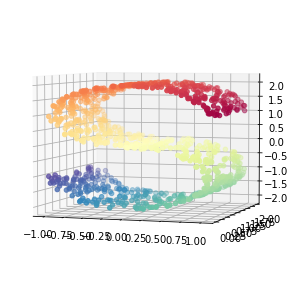

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn import manifold, datasets

n_points = 1000
Scurve, Scolor = datasets.make_s_curve(n_points, random_state=0)

fig = plt.figure(figsize=(5, 7))

ax = fig.add_subplot(111, projection='3d')
ax.scatter(Scurve[:, 0], Scurve[:, 1],
   Scurve[:, 2], c=Scolor,
   cmap=plt.cm.Spectral)
ax.view_init(4, -72)
plt.show()

\newpage

**Exercise:** Describe the structure evident in the plot, and how it relates to
the color. Do you think that Euclidean distance is a good measure of dissimilarity
in this case?

\answerlines{15}

\newpage

**Exercise:** Comment on what happens in this example if we use metric MDS with Euclidean distance as the
measure of dissimilarity.

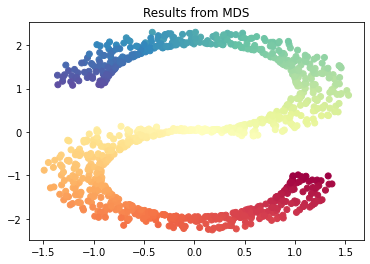

In [2]:
mdsout = manifold.MDS(n_components=2)
Y = mdsout.fit_transform(Scurve)
plt.scatter(Y[:, 0], Y[:, 1], c=Scolor, 
   cmap=plt.cm.Spectral)
plt.title("Results from MDS")
plt.show()

\newpage

## Isomap {-}

As stated above, some approaches to dimension reduction attempt to construct an improved
measure of "dissimilarity" and incorporate that into metric
MDS. The above example is good illustration of why that can be
necessary.

Consider the following observation: Although Euclidean distance is not
a useful **global** measure of dissimilarity, it is useful on **local** scales.
In other words, Euclidean distance could be used to identify two observations
which are very similar.

**Isomap** is
an approach to nonlinear dimension reduction built on MDS with
a well-chosen **geodesic distance** between points. The steps:

1. **Connect all "neighboring" observations.** This can be achieved
by finding all observations within distance $\epsilon$ or by find the $K$ nearest
neighbors of each observation.

2. **Assign weights to connected observations.** The weight is equal to
the Eucldean distance separating them.

3. **Calculate the geodesic distance between all pairs of points.** The shortest path between points using the provided weights.

4. **Use metric MDS on the resulting distance matrix.**

\newpage

Let's return to our synthetic example above.
Note that in this case $K=10$ is utilized.
Note that choosing $K$ too small creates the
risk of having a "fragmented" graph in which there are observations with no
connecting path.

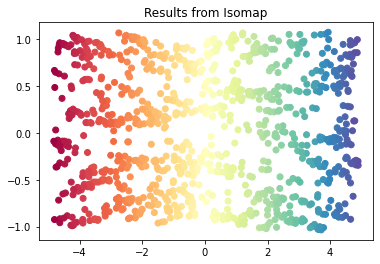

In [4]:
Y = manifold.Isomap(n_neighbors=10, 
    n_components=2).fit_transform(Scurve)

plt.scatter(Y[:, 0], Y[:, 1], c=Scolor, 
   cmap=plt.cm.Spectral)
plt.title("Results from Isomap")
plt.show()

**Exercise:** Comment on the results from this dimension reduction. What would happen if only the first dimension was utilized in further analyses?

\answerlines{10}

\newpage

**Stock Example**

In this example we will consider a sample of 1000 randomly chosen
NYSE stocks. For each, a time series of their closing price is
obtained, covering 30 trading days from August 18, 2017 to September
29, 2017.

**Exercise:** What are potential issues that could arise if we
calculate pairwise distances between these time series using
Euclidean distance?

\answerlines{15}

\newpage

The approach we will take here is to transform each time series
into a sequence of True/False based on whether or not the
price increased or not versus the previous day.

In [5]:
import pandas as pd
import numpy as np

stocksample = pd.read_csv("stocksample.txt",
    sep="\t")

stocksample['sector'].fillna("None",
    inplace=True) 

stocksampleupdown = stocksample.iloc[:,4:34]
stocksampleupdown = np.diff(stocksampleupdown,
    axis=1) > 0

We calculate the distance between a pair by calculating the proportion of the
entries in a pair of vectors which disagree. This is referred to as the
**Hamming Distance**.

In [6]:
from scipy.spatial.distance \
   import pdist, squareform

stockdistmat = \
   squareform(pdist(stocksampleupdown,
    metric='hamming'))

\newpage

Now run Isomap, with $K=5$, and retaining a five-dimensional
representation of the objects.

In [7]:
from sklearn.manifold import Isomap

isooutstocks = Isomap(n_neighbors=5, 
   n_components=5).fit_transform(stockdistmat)

Now create a plot looking at the first two dimensions, coloring
the points by sector:

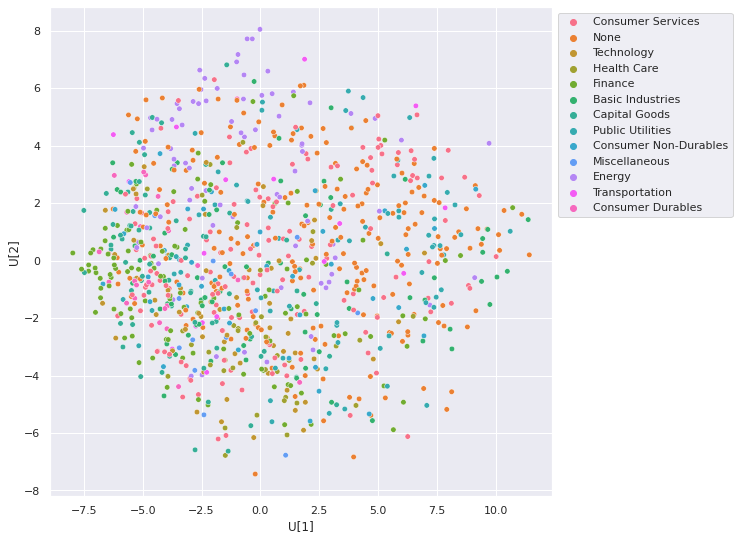

In [8]:
import seaborn as sns

stocksampleiso = pd.concat([stocksample,
   pd.DataFrame(isooutstocks, columns=\
   ["iso1", "iso2", "iso3", "iso4", "iso5"])],
   axis=1)

sns.set(rc={'figure.figsize':(9,9)})

ax = sns.scatterplot(x="iso1", y="iso2",
   data=stocksampleiso, s=30, hue="sector")
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.xlabel("U[1]")
plt.ylabel("U[2]")
plt.show()

**Exercise:** Execute the commands below and explore the structure.

In [8]:
# import plotly.express as px

# fig = px.scatter_3d(stocksampleiso, x='iso1', 
#    y='iso2', z='iso3', hover_name="name",
#    color="sector", opacity=0.7)
# fig.show()

\newpage

## Diffusion Map {-}

A criticism of Isomap is that it is computationally intensive
to calculate the geodesic distances. Also, Isomap
is not as robust to noise in the data as are some other approaches, including
the one described next, **diffusion map**.

This approach is again built on MDS, but the underlying distance between
pairs of points is calculated from **random walks**
constructed on the observed data. Steps in this random walk are taken from
observation to observation based on proximity in Euclidean distance (typically),
but only neighbors at short distances are candidates for stepping to.

If the random walk "diffuses" over enough steps, the result
is a **distribution** over the observations. Comparing
distributions between different starting points gives a natural measure of global
proximity.

\newpage

The figure below illustrates the idea. 

Two observations
in the data set are marked with "X." For either X, imagine a
random walk that takes ten steps away from that observation. Steps
are small, i.e., the probability of stepping to an observation
decreases rapidly as a function of its distance from the current
position in the walk.

The ending position of the random walk is, of course, random. The shading
shows the probability that the random walk ends at various observations.

The dissimilarity of these distributions is a natural way of quantifying the
distance between them.

![](dmapspiral.png)

\newpage

**Technical Details on Diffusion Map**

The process starts by constructing a **similarity measure**
between pairs of observations. There is some flexibility in how this
is done, but a standard approach is quantify the similarity between
observations $i$ and $j$ as
\begin{equation*}
s_{ij} = \exp(-\| {\bf x}_i - {\bf x}_j\|^2/\epsilon)
\end{equation*}
where $\epsilon$ is a tuning parameter.

Next, the probability of stepping from observation $i$ to any
 other observation $j$ is
 \begin{equation*}
p_{ij} = s_{ij} \bigg/ \sum_k s_{ik}
 \end{equation*}
Note that this scaling will force $\sum_j p_{ij} = 1$.

This completely defines the behaviour of the random walk.

The choice of $\epsilon$ is crucial. If it is chosen too small, then steps
of the random walk will likely move only to other observations which
are very similar, and, in particular, remain at the same observation.
(A "step" can be to the same observation.)

If $\epsilon$ is chosen too large, then it will be possible to
step to observations which are actually quite dissimilar, and the
result will be a mapping that does not adhere to the lower dimensional
structure of interest.

There is no "right" choice of $\epsilon$, but there are algorithms
for making (hopefully) informed choices, including that of Berry, Giannakis and Harlim.

\newpage

Below shows the results when running
diffusion map on the S-Curve example.

In this case, $\epsilon$ is chosen by the Berry, Giannakis and Harlim
algorithm.

The random walk is much more robust to noise in the data
than is the geodesic distance. One way to see this is to
note that small perturbations in the position of any
observation will have very little effect on the diffusion
distances, but could potentially affect geodesic distances
a great deal.

Also, there are computational shortcuts that make calculating
the diffusion map quick. Much of this is based on the theory
of **Markov chains**.

In [9]:
from pydiffmap import diffusion_map as dm

dmap = dm.DiffusionMap.from_sklearn(n_evecs=3, 
   epsilon="bgh")

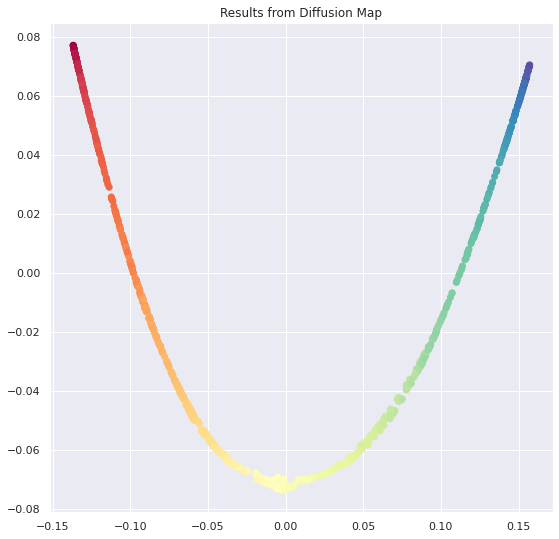

In [10]:
Scurvediffmap = dmap.fit_transform(Scurve)

plt.scatter(Scurvediffmap[:, 0], 
   Scurvediffmap[:, 1], c=Scolor, 
   cmap=plt.cm.Spectral)
plt.title("Results from Diffusion Map")
plt.show()

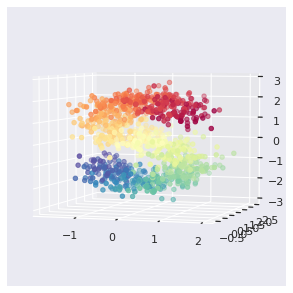

In [12]:
Snoise = Scurve + \
   np.matrix(np.random.normal(0,.3,3000)).\
   reshape(1000,3)

fig = plt.figure(figsize=(5, 7))

ax = fig.add_subplot(111, projection='3d')
ax.scatter(Snoise[:, 0], Snoise[:, 1],
   Snoise[:, 2], c=Scolor,
   cmap=plt.cm.Spectral)
ax.view_init(4, -72)
plt.show()

\newpage

## Return to the Stock Example {-}

Let's revisit the stock time series data. This time, we will use the original
time series, but rescale each so that they have mean zero and variance one.

In [ ]:
stocksamplescl = stocksample.iloc[:,4:34]

for i in range(1000):
    stocksamplescl.iloc[i,:] = \
    (stocksamplescl.iloc[i,:] - \
    np.mean(stocksamplescl.iloc[i,:]))/\
    np.std(stocksamplescl.iloc[i,:])

Run the diffusion map procedure.

In [ ]:
dmap = dm.DiffusionMap.from_sklearn(n_evecs=3, 
   epsilon=50)

dmapoutstocks = \
   dmap.fit_transform(stocksamplescl)

\newpage

**Exercise:** Create the figure to visualize the results. Comment on what you find.

In [ ]:
stocksampledmap = pd.concat([stocksample,
   pd.DataFrame(dmapoutstocks, columns=\
   ["dmap1", "dmap2", "dmap3"])],
   axis=1)

fig = px.scatter_3d(stocksampledmap, x='dmap1', 
   y='dmap2', z='dmap3', hover_name="name",
   color="sector", opacity=0.7)
fig.show()

\newpage

**The Nystrom Extension**

Unfortunately, unlike PCA, nonlinear dimension reduction techniques do not have a simple means of **out-of-sample extension**, i.e., placing new observations into the newly-formed low-dimensional representation.

A standard approach to doing this is referred to as the **Nystrom extension**. See Bengio, et al. (2004) for some technical details, but the approach is built on approximating the eigenfunction of the underlying kernel operator at the unsampled points.

The diffusion map Python function presented above implements this simply with `transform()`.

In [ ]:
dmap = dm.DiffusionMap.from_sklearn(n_evecs=3, 
   epsilon="bgh")

Scurvediffmap = dmap.fit_transform(Scurve)

In [ ]:
print(dmap.transform(Scurve[0]))
print(Scurvediffmap[0])

\newpage

**Exercise:** Consider the noisy version of the S-curve below.
Refit both Isomap and Diffusion Map to this example. Try multiple
simulated data sets.